<a href="https://colab.research.google.com/github/Jarax26/ST0245-002/blob/main/CodigoProyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install pydeck

In [44]:
!pip install geopandas

In [45]:
import pandas as pd
import geopandas as gpd
import pydeck as pdk
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from shapely import wkt
from pandas.core.frame import DataFrame

In [46]:
area = pd.read_csv('https://raw.githubusercontent.com/mauriciotoro/ST0245-Eafit/master/proyecto/Datasets/poligono_de_medellin.csv', sep=';')
area['geometry'] = area['geometry'].apply(wkt.loads)
area = gpd.GeoDataFrame(area)

In [47]:
edges = pd.read_csv('https://raw.githubusercontent.com/mauriciotoro/ST0245-Eafit/master/proyecto/Datasets/calles_de_medellin_con_acoso.csv', sep=';')
edges['geometry'] = edges['geometry'].apply(wkt.loads)
edges = gpd.GeoDataFrame(edges)

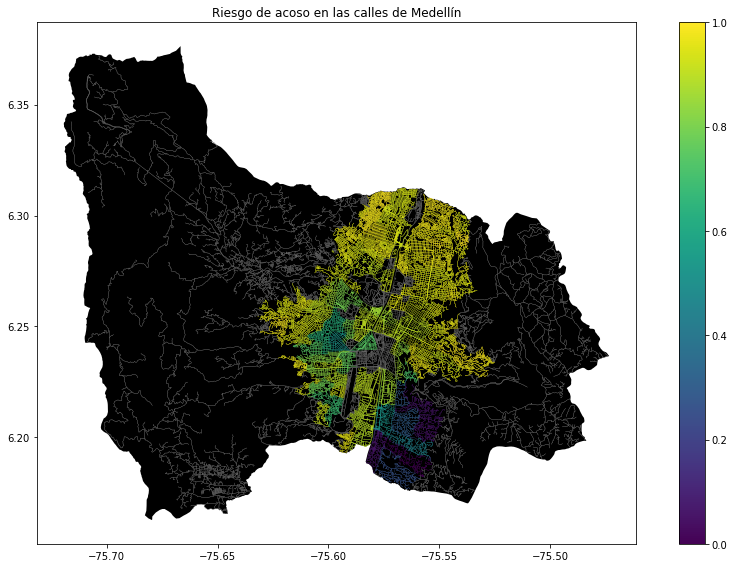

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))

area.plot(ax=ax, facecolor='black')

edges.plot(ax=ax, linewidth=0.3, column='harassmentRisk', legend=True, missing_kwds={'color': 'dimgray'})

plt.title("Riesgo de acoso en las calles de Medellín")
plt.tight_layout()
plt.savefig("mapa-riesgo-de-acoso.png")

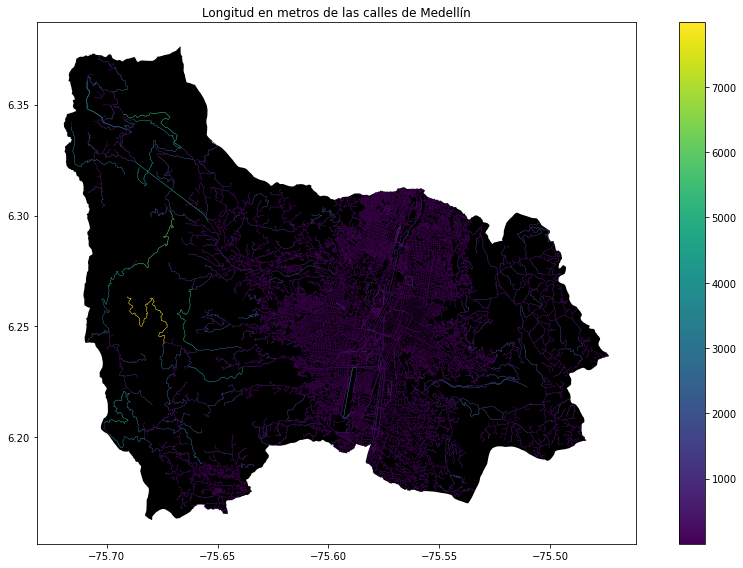

In [49]:
fig, ax = plt.subplots(figsize=(12, 8))

area.plot(ax=ax, facecolor='black')

edges.plot(ax=ax, linewidth=0.3, column='length', legend=True, missing_kwds={'color': 'dimgray'})

plt.title("Longitud en metros de las calles de Medellín")
plt.tight_layout()
plt.savefig("mapa-de-called-con-longitud.png")

In [50]:
distancia = nx.from_pandas_edgelist(edges, source='origin', target='destination', edge_attr='length')

origin_long = float(input('Ingrese la longitud del origen>>> '))
origin_lat = float(input('Ingrese la latitud del origen>>> '))

origen = (origin_long, origin_lat)

Ingrese la longitud del origen>>> -75.5705202
Ingrese la latitud del origen>>> 6.2106275


In [51]:
destination_long = float(input('Ingrese la longitud del destino>>> '))
destination_lat = float(input('Ingrese la latitud del destino>>> '))

destino = (destination_long, destination_lat)

Ingrese la longitud del destino>>> -75.5715105
Ingrese la latitud del destino>>> 6.2063061


In [60]:
shortest_route = nx.dijkstra_path(distancia, source=str(origen), target=str(destino), weight='length')

In [61]:
distance = pd.DataFrame(shortest_route, columns=['calles'])

In [62]:
distance['longitud'] = distance['calles'].map(lambda x: x.split(',')[0])
distance['latitud'] = distance['calles'].map(lambda x: x.split(',')[1])

In [63]:
del(distance['calles'])

In [64]:
dots = list(zip(distance.longitud, distance.latitud))
dots

[('(-75.5705202', ' 6.2106275)'),
 ('(-75.5705604', ' 6.2105262)'),
 ('(-75.5708085', ' 6.2098649)'),
 ('(-75.570717', ' 6.2098126)'),
 ('(-75.5710111', ' 6.2089516)'),
 ('(-75.5711601', ' 6.2085728)'),
 ('(-75.5713302', ' 6.2075797)'),
 ('(-75.5715105', ' 6.2063061)')]

In [65]:
streets = [dots]
way = list(zip(streets))
way

[([('(-75.5705202', ' 6.2106275)'),
   ('(-75.5705604', ' 6.2105262)'),
   ('(-75.5708085', ' 6.2098649)'),
   ('(-75.570717', ' 6.2098126)'),
   ('(-75.5710111', ' 6.2089516)'),
   ('(-75.5711601', ' 6.2085728)'),
   ('(-75.5713302', ' 6.2075797)'),
   ('(-75.5715105', ' 6.2063061)')],)]

In [66]:
shortest_distance = pd.DataFrame(way, columns= ['path'])

In [80]:
route = [shortest_distance]
end = pd.DataFrame(route)
end

ValueError: ignored

In [81]:
def route_color(c):
  c = c.lstrip("#")
  return tuple(int(c[i: i + 2], 16) for i in (0, 2, 4))

end['color'] = end['color'].apply(route_color)

NameError: ignored

In [82]:
coord_map = pdk.ViewState(latitude=origin_lat, longitude=origin_long, zoom=18, bearing=0, pitch=45)

In [83]:
layer = pdk.Layer(
  type="PathLayer",
  data=end,
  pickable=True,
  get_color="color",
  width_scale=2,
  width_min_pixels=2,
  get_path="path",
  get_width=2,
)

NameError: ignored

In [78]:
map = pdk.Deck(layers=[layer], initial_view_state = coord_map)

In [76]:
map.to_html("map.html")

TypeError: ignored